In [2]:
from mpasanalysis import *
import e3sm_res_cmp
%matplotlib inline

In [55]:
# get paths of restart files, monthly mean output files, processed climatology files and output figures
# ts_ys = 1
# ts_ye = 20
# plt_ys = 20
# plt_ye = 20
# data_root = e3sm_res_cmp.load_paths_ocn(climo_ys=ts_ys, climo_ye=ts_ye,
#                                         ts_ys=ts_ys, ts_ye=ts_ye, runname='gl-mesh')
ts_ys = 1
ts_ye = 50
plt_ys = 40
plt_ye = 40
data_root = e3sm_res_cmp.load_paths_ocn(climo_ys=ts_ys, climo_ye=ts_ye,
                                        ts_ys=ts_ys, ts_ye=ts_ye)

# ts_ys = 1
# ts_ye = 55
# plt_ys = 55
# plt_ye = 55
# data_root = e3sm_res_cmp.load_paths_ocn(climo_ys=ts_ys, climo_ye=ts_ye,
#                                         ts_ys=ts_ys, ts_ye=ts_ye, runname='high-res')
rst_root = data_root['rst_root']
climo_root = data_root['climo_root']
mon_root = data_root['mon_root']
fig_root = data_root['fig_root']
rst_file = rst_root+'/mpaso.rst.{:04d}-01-01_00000.nc'.format(ts_ye+1)
mon_file = rst_root+'/mpaso.hist.am.timeSeriesStatsMonthly.{:04d}-01-01.nc'.format(plt_ye+1)

Running on machine pn1803144.lanl.gov


In [56]:
# load dataset
mpasmesh = MPASMesh(filepath=rst_file)
mpasodata = MPASOData(filepath=mon_file, filepath_mesh=rst_file)

Reading mesh data from /Users/qingli/data/mpas/test/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /Users/qingli/data/mpas/test/mpaso.rst.0051-01-01_00000.nc
Plotting map of Salinity at   5.00 m (psu) at region 'LabSea'
Cell closest to P0: 304.78776 60.16019


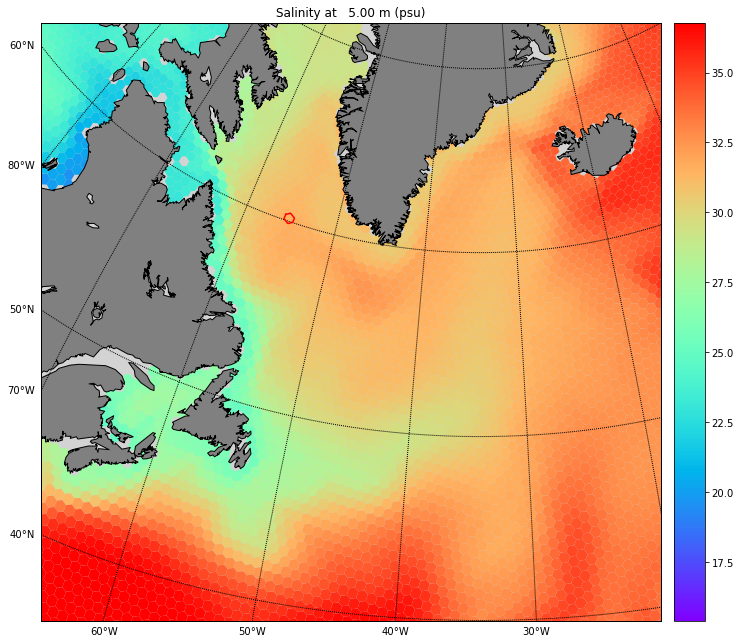

In [57]:
mpaso_vol_data = mpasodata.get_volume(varname='timeMonthly_avg_activeTracers_salinity',
                                      name='Salinity', units='psu')
plt.figure(figsize=[12,11])
m, f = mpaso_vol_data.get_map(depth=0.0).plot(region='LabSea', ptype='pcolor')

# select cell
lon_p0, lat_p0 = 305, 60
fmesh = mpasmesh.load()
lon_cell = np.degrees(fmesh.variables['lonCell'][:])
lat_cell = np.degrees(fmesh.variables['latCell'][:])
idx_cell = get_index_latlon(lon_p0, lat_p0, lon_cell, lat_cell)
print('Cell closest to P0: {:8.5f} {:8.5f}'.format(lon_cell[idx_cell], lat_cell[idx_cell]))
path_c = mpasmesh.get_closed_path_cell(idx_cell)
# plot paths
path_c.plot_edge(m, c='r')

Reading mesh data from /Users/qingli/data/mpas/test/mpaso.rst.0051-01-01_00000.nc


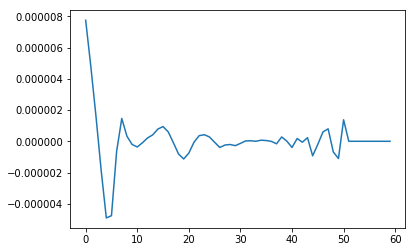

In [58]:
# read data
mpaso_tend_hadv = mpasodata.get_volume(varname='timeMonthly_avg_activeTracerHorizontalAdvectionTendency_salinityHorizontalAdvectionTendency',
                                       name='Salinity tendency - horiontal advection', units='psu/s')
tend_hadv = mpaso_tend_hadv.data[idx_cell,:]
plt.plot(tend_hadv)

Reading mesh data from /Users/qingli/data/mpas/test/mpaso.rst.0051-01-01_00000.nc


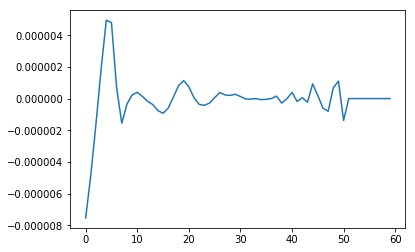

In [59]:
# read data
mpaso_tend_vadv = mpasodata.get_volume(varname='timeMonthly_avg_activeTracerVerticalAdvectionTendency_salinityVerticalAdvectionTendency',
                                       name='Salinity tendency - vertical advection', units='psu/s')
tend_vadv = mpaso_tend_vadv.data[idx_cell,:]
plt.plot(tend_vadv)

Reading mesh data from /Users/qingli/data/mpas/test/mpaso.rst.0051-01-01_00000.nc


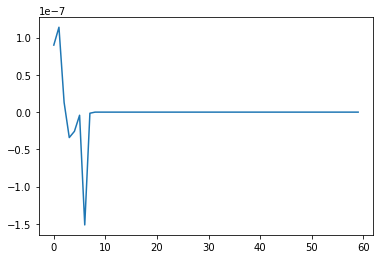

In [60]:
# read data
mpaso_tend_vmix = mpasodata.get_volume(varname='timeMonthly_avg_activeTracerVertMixTendency_salinityVertMixTendency',
                                        name='Salinity tendency - vertical mixing', units='psu/s')
tend_vmix = mpaso_tend_vmix.data[idx_cell,:]
plt.plot(tend_vmix)

Reading mesh data from /Users/qingli/data/mpas/test/mpaso.rst.0051-01-01_00000.nc


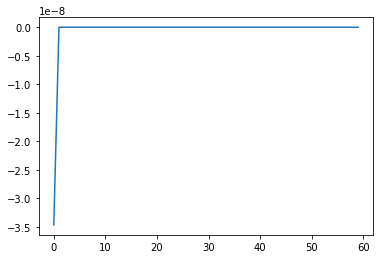

In [61]:
# read data
mpaso_tend_sflx = mpasodata.get_volume(varname='timeMonthly_avg_activeTracerSurfaceFluxTendency_salinitySurfaceFluxTendency',
                                 name='Salinity tendency - surface flux', units='psu/s')
tend_sflx = mpaso_tend_sflx.data[idx_cell,:]
plt.plot(tend_sflx)

Reading mesh data from /Users/qingli/data/mpas/test/mpaso.rst.0051-01-01_00000.nc


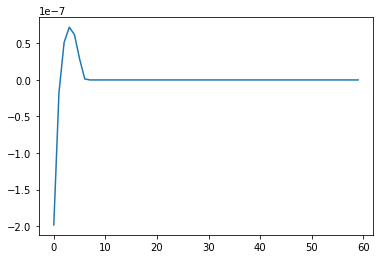

In [62]:
# read data
mpaso_tend_nloc = mpasodata.get_volume(varname='timeMonthly_avg_activeTracerNonLocalTendency_salinityNonLocalTendency',
                                       name='Salinity tendency - non-local flux', units='psu/s')
tend_nloc = mpaso_tend_nloc.data[idx_cell,:]
plt.plot(tend_nloc)

Reading mesh data from /Users/qingli/data/mpas/test/mpaso.rst.0051-01-01_00000.nc


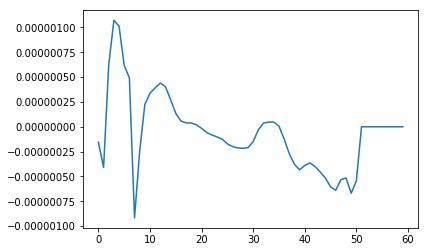

In [63]:
# read data
mpaso_tend_tten = mpasodata.get_volume(varname='timeMonthly_avg_activeTracersTend_salinityTend',
                                       name='Salinity tendency', units='psu/s')
tend_tten = mpaso_tend_tten.data[idx_cell,:]
plt.plot(tend_tten)

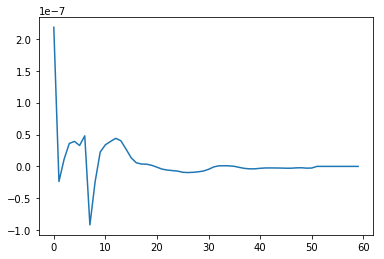

In [64]:
plt.plot(tend_hadv+tend_vadv)

In [65]:
mpaso_tend_hadv.data.size

14109600

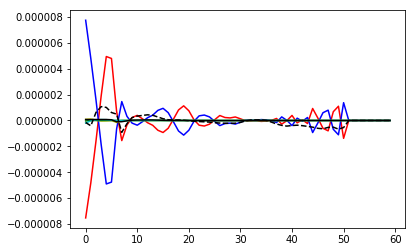

In [66]:
plt.plot(tend_vadv, '-r')
plt.plot(tend_hadv, '-b')
plt.plot(tend_vmix, '-y')
plt.plot(tend_sflx, '-g')
plt.plot(tend_nloc, '-c')
plt.plot(tend_vadv+tend_hadv+tend_vmix+tend_sflx+tend_nloc, '-k')
plt.plot(tend_tten, '--k')